## Importing the mushroom dataset from UCI website:

In [1]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# Fetching the dataset
mushroom = fetch_ucirepo(id=73)

# Data
X_data = mushroom.data.features
y_data = mushroom.data.targets

## Now, Cleaning the data, using "One-Hot-Encoding" and using impute for missing data:

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame(data=X_data, columns=mushroom.feature_names)
df['class'] = y_data

# One-hot encoding to the categorical features
categorical_cols = df.columns[:-1]  # Excluding the target variable
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Imputing the missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Splitting the data into features (X) and target variable (y)
X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

## Splitting the data:
Here, I am using 80% for the training set and 20% for the test set

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training set, 20% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Again, splitting the temporary set into 50% validation set and 50% test set
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the sizes of the sets
print("\nTraining set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

# Printing the data for each set
print("\nTraining set:")
print("X_train:", X_train)
print("y_train:", y_train)

print("\nValidation set:")
print("X_valid:", X_valid)
print("y_valid:", y_valid)

print("\nTest set:")
print("X_test:", X_test)
print("y_test:", y_test)

# Metadata
print("Printing Metadata:")
print(mushroom.metadata)

# Variable information
print("\nPrinting Variable Info:")
print(mushroom.variables)


Training set size: 6499
Validation set size: 812
Test set size: 813

Training set:
X_train:      cap-shape_b cap-shape_c cap-shape_f cap-shape_k cap-shape_s cap-shape_x  \
7873           0           0           0           1           0           0   
6515           0           0           0           0           0           1   
6141           0           0           1           0           0           0   
2764           0           0           1           0           0           0   
438            1           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
5226           0           0           0           0           0           1   
5390           0           0           0           1           0           0   
860            0           0           1           0           0           0   
7603           0           0           0           1           0           0   
7270           0           

## Now, I am applying Logistic Regression to create the model:
Also, I am printing the training and test accuracies and losses

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, log_loss

# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss or loss in general
train_loss = log_loss(y_train, model.predict_proba(X_train))
test_loss = log_loss(y_test, model.predict_proba(X_test))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

Train accuracy: 1.0
Test accuracy: 1.0
Train log loss: 0.005433484896670235
Test log loss: 0.006115512741207106


## Now I am printing below the results using matplot library, as I got almost same loss and the same accuracy in both cases for the train and the test set:

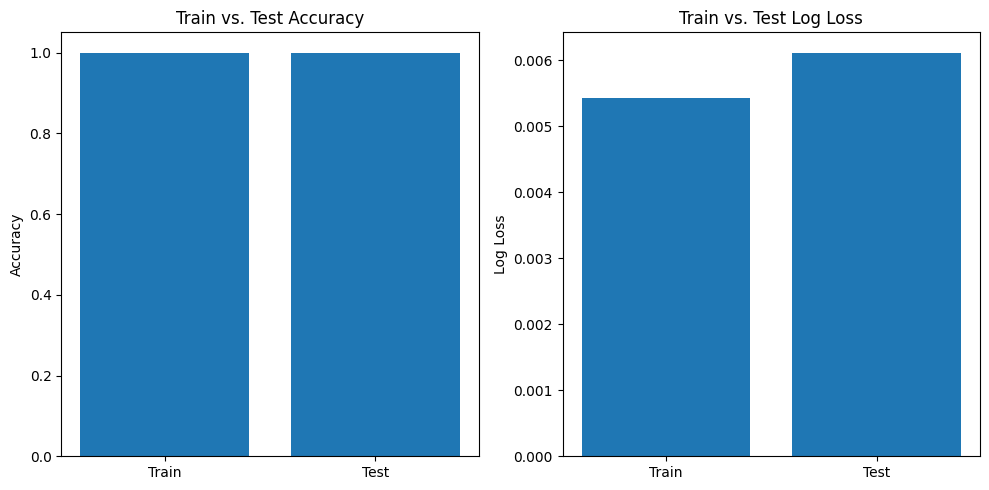

In [5]:
import matplotlib.pyplot as plt

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss or loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

## For convenience, I am using the classification report for the test set here to check if my model is working fine:

In [6]:
from sklearn.metrics import classification_report

# Printing the classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Test Set:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       430
           p       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



## Hence, finally I can conclude that the model is working properly without much loss and with proper accuracy on both the training and the test set, which tells actually that the model is just right; which is, it neither overfit, nor it is underfit. The model is just right.